In [1]:
import pandas as pd
import numpy as np

In [ ]:
path = '../../data/gtd.csv'
df = pd.read_csv(path, encoding='ISO-8859-1')
df = df[(df["gname"] != 'Unknown')]
print(df['gname'].value_counts())


C:\Users\alexa\AppData\Local\Temp\ipykernel_3276\631075107.py:2: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, encoding='ISO-8859-1')


gname
Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
                                                    ... 
Ansar Sarallah                                         1
Sword of Islam                                         1
Support of Ocalan-The Hawks of Thrace                  1
Arab Revolutionary Front                               1
MANO-D                                                 1
Name: count, Length: 3536, dtype: int64


In [3]:
print("Original DataFrame size:", len(df))
df = df.loc[(df['iyear'] != 0) & (df['imonth'] != 0) & (df['iday'] != 0)]
print("Filtered DataFrame size:", len(df))

Original DataFrame size: 98909
Filtered DataFrame size: 98343


In [4]:
df = df.dropna(subset=['iyear', 'imonth', 'iday'])

In [5]:
# Correctly format the date by specifying the dictionary keys as column names for year, month, and day
df['attack_date'] = pd.to_datetime({'year': df['iyear'], 'month': df['imonth'], 'day': df['iday']})

# This line will create a new column 'attack_date' in your DataFrame where each entry is a datetime object
# constructed from the year, month, and day specified in 'iyear', 'imonth', 'iday'.


In [6]:
df = df[df['weaptype1_txt'] != 'Unknown']


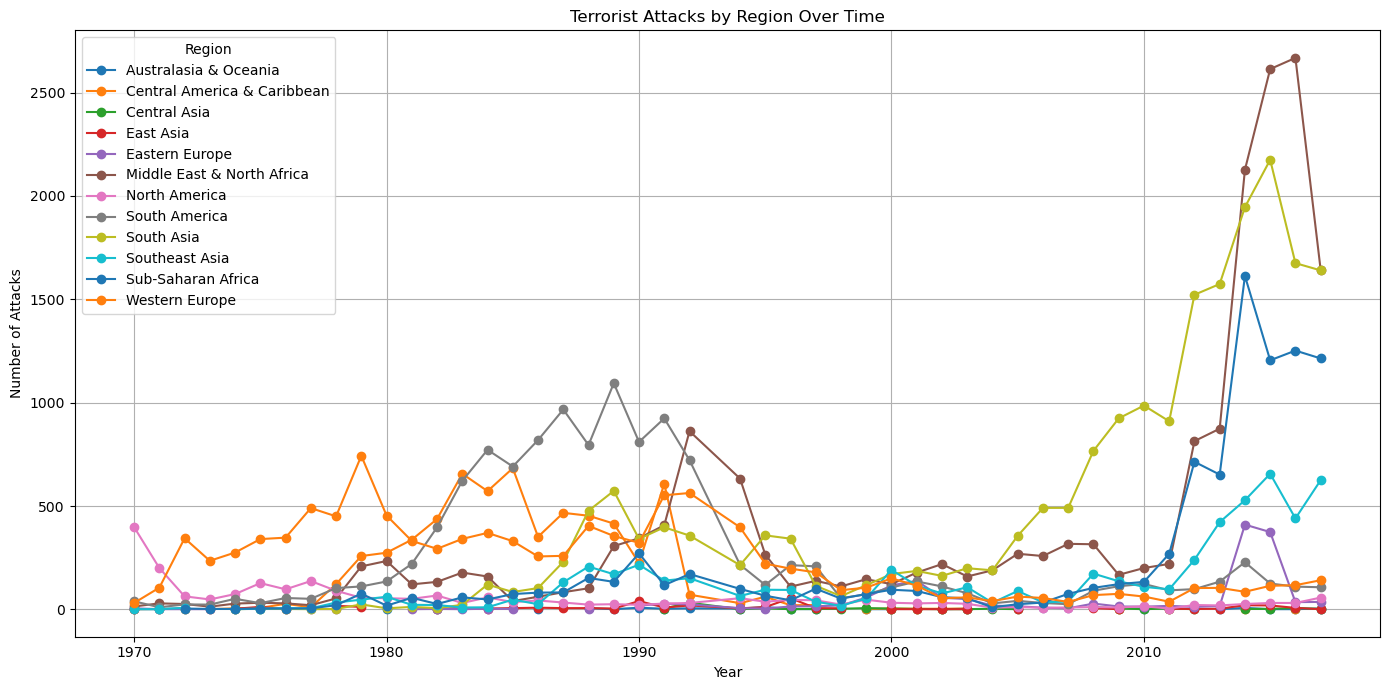

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Step 1: Group by 'iyear' and 'region_txt' and count the occurrences
region_counts = df.groupby(['iyear', 'region_txt']).size().reset_index(name='count')

# Step 2: Pivot the table
pivot_table = region_counts.pivot(index='iyear', columns='region_txt', values='count')

# Step 3: Create a figure for the line chart
fig, ax = plt.subplots(figsize=(14, 7))  # Adjusted for a clear view

# Plotting the line chart
pivot_table.plot(kind='line', ax=ax, marker='o', linestyle='-')  # Added markers for visibility
ax.set_title('Terrorist Attacks by Region Over Time')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Attacks')
ax.legend(title='Region', loc='upper left')
ax.grid(True)

# Display the plot
plt.tight_layout()
plt.show()


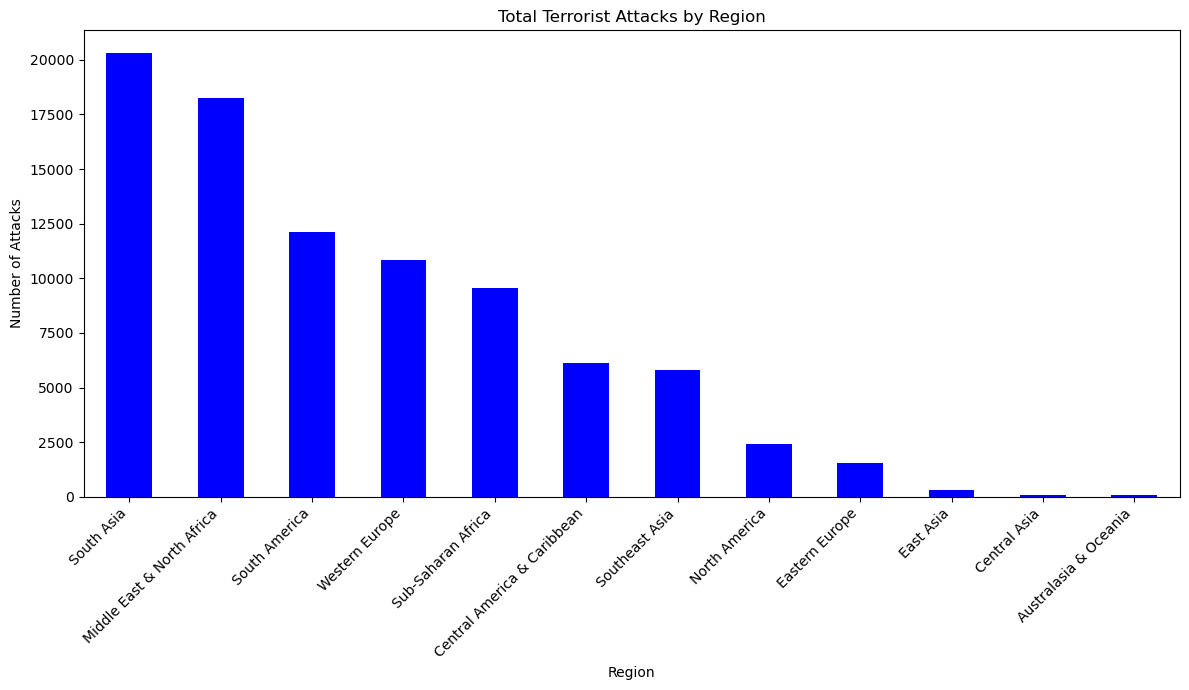

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Step 1: Count the total number of attacks by region
total_attacks_by_region = df['region_txt'].value_counts()

# Step 2: Create a figure for the bar chart
fig, ax = plt.subplots(figsize=(12, 7))  # Slightly larger for better visibility

# Plotting the bar chart
total_attacks_by_region.plot(kind='bar', ax=ax, color='b')  # Color can be adjusted if desired
ax.set_title('Total Terrorist Attacks by Region')
ax.set_xlabel('Region')
ax.set_ylabel('Number of Attacks')

# Enhance legibility
plt.xticks(rotation=45, ha='right')  # Rotate the labels for better readability
plt.tight_layout()

# Display the plot
plt.show()


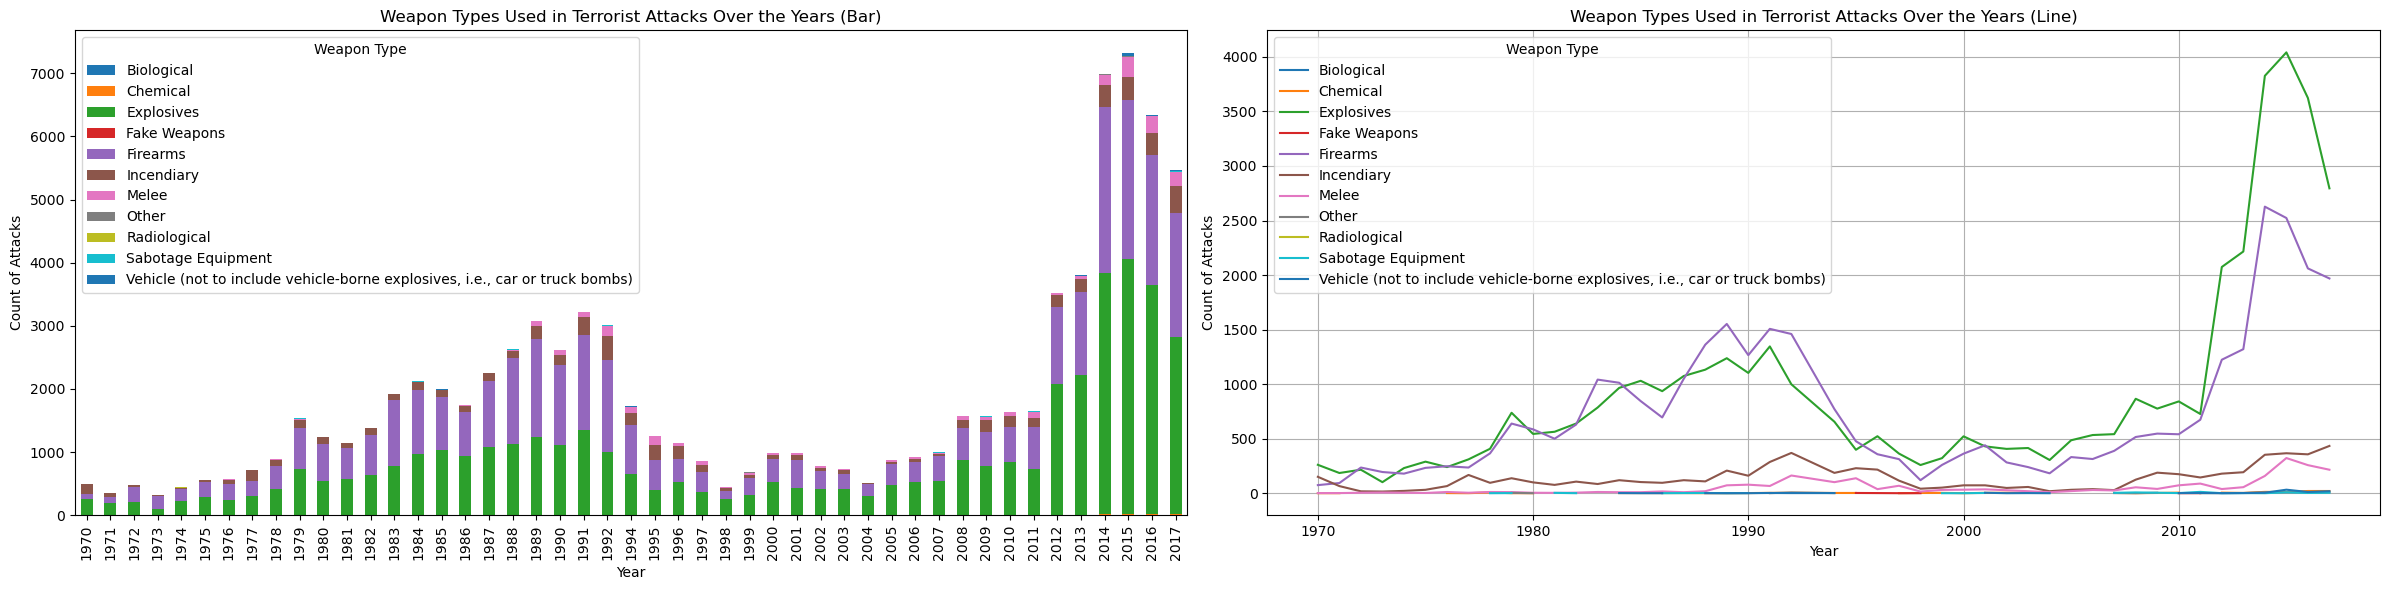

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Step 1: Group by 'iyear' and 'weaptype1_txt' and count the occurrences
weapon_counts = df.groupby(['iyear', 'weaptype1_txt']).size().reset_index(name='count')

# Step 2: Pivot the table
pivot_table = weapon_counts.pivot(index='iyear', columns='weaptype1_txt', values='count')

# Step 3: Create a figure and set of subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

# Plotting the stacked bar chart
pivot_table.plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title('Weapon Types Used in Terrorist Attacks Over the Years (Bar)')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Count of Attacks')
axes[0].legend(title='Weapon Type')

# Plotting the line chart
pivot_table.plot(kind='line', ax=axes[1])
axes[1].set_title('Weapon Types Used in Terrorist Attacks Over the Years (Line)')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Count of Attacks')
axes[1].legend(title='Weapon Type', loc='upper left')
axes[1].grid(True)

# Display the plots
plt.tight_layout()
plt.show()


In [10]:
df['gname'].value_counts()

gname
Taliban                                             6173
Islamic State of Iraq and the Levant (ISIL)         4518
Shining Path (SL)                                   4254
Farabundo Marti National Liberation Front (FMLN)    3268
Al-Shabaab                                          2742
                                                    ... 
Anti-Communist Command (KAK)                           1
Uighur Liberation Organization                         1
Mandela Soccer Club                                    1
Roberto Santucho Revolutionary Group                   1
Student Militants                                      1
Name: count, Length: 3208, dtype: int64

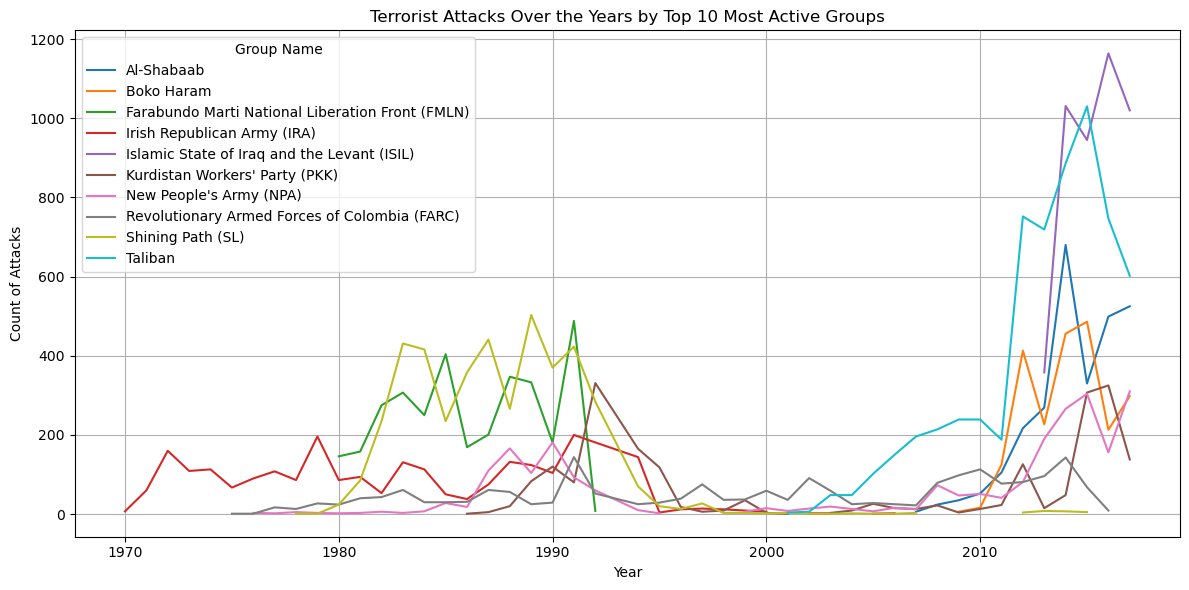

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Step 1: Group by 'iyear' and 'gname' and count the occurrences
weapon_counts = df.groupby(['iyear', 'gname']).size().reset_index(name='count')

# Step 2: Identify the top 10 most active groups
top_groups = weapon_counts.groupby('gname')['count'].sum().nlargest(10).index

# Step 3: Filter the data to include only the top 10 groups
filtered_counts = weapon_counts[weapon_counts['gname'].isin(top_groups)]

# Step 4: Pivot the table with filtered data
pivot_table = filtered_counts.pivot(index='iyear', columns='gname', values='count')

# Step 5: Create a figure for the line chart
fig, ax = plt.subplots(figsize=(12, 6))  # Adjusted for one plot

# Plotting the line chart
pivot_table.plot(kind='line', ax=ax)
ax.set_title('Terrorist Attacks Over the Years by Top 10 Most Active Groups')
ax.set_xlabel('Year')
ax.set_ylabel('Count of Attacks')
ax.legend(title='Group Name', loc='upper left')
ax.grid(True)

# Display the plot
plt.tight_layout()
plt.show()


In [12]:
# Creating more subsets for different time spans
df7080 = df[(df['iyear'] <= 1980)]
df8195 = df[(df['iyear'] > 1980) & (df['iyear'] <= 1995)]
df9610 = df[(df['iyear'] > 1995) & (df['iyear'] <= 2010)]
df1117 = df[(df['iyear'] > 2010)]

partitions = ["df7080", "df8195", "df9610", "df1117"]
dataframes = [df7080, df8195, df9610, df1117]

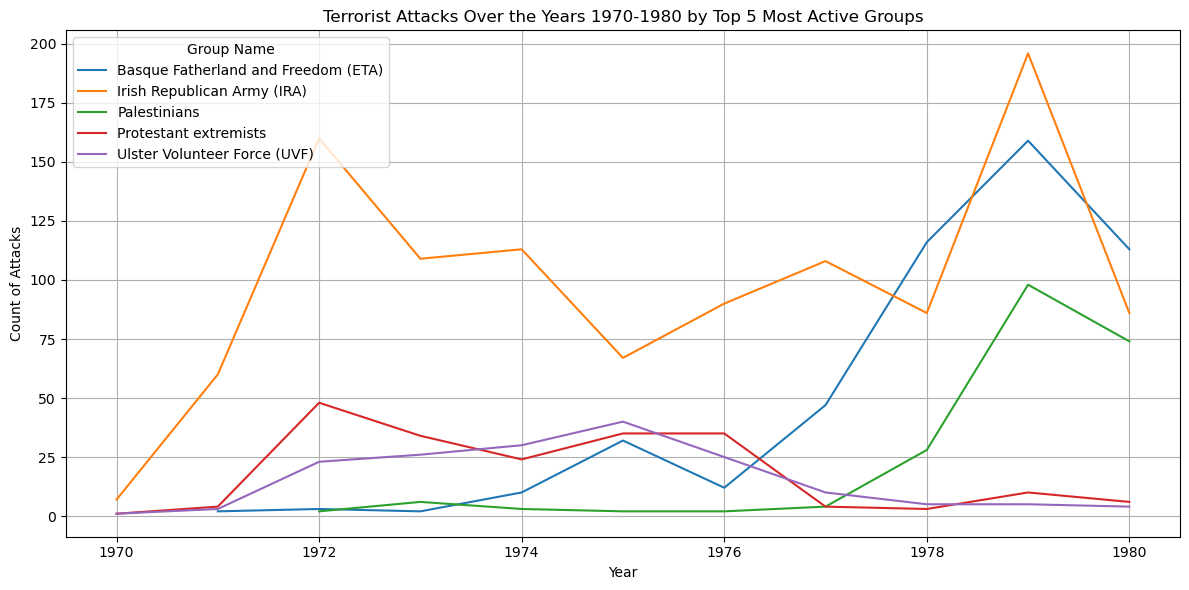

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Step 1: Group by 'iyear' and 'gname' and count the occurrences
weapon_counts = df7080.groupby(['iyear', 'gname']).size().reset_index(name='count')

# Step 2: Identify the top 10 most active groups
top_groups = weapon_counts.groupby('gname')['count'].sum().nlargest(5).index

# Step 3: Filter the data to include only the top 10 groups
filtered_counts = weapon_counts[weapon_counts['gname'].isin(top_groups)]

# Step 4: Pivot the table with filtered data
pivot_table = filtered_counts.pivot(index='iyear', columns='gname', values='count')

# Step 5: Create a figure for the line chart
fig, ax = plt.subplots(figsize=(12, 6))  # Adjusted for one plot

# Plotting the line chart
pivot_table.plot(kind='line', ax=ax)
ax.set_title('Terrorist Attacks Over the Years 1970-1980 by Top 5 Most Active Groups')
ax.set_xlabel('Year')
ax.set_ylabel('Count of Attacks')
ax.legend(title='Group Name', loc='upper left')
ax.grid(True)

# Display the plot
plt.tight_layout()
plt.show()


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import os  # Import os module to handle directory creation

def top5year(df, specific_year, start_year, end_year):
    # Create directory path for the main folder and subfolder for each year
    main_directory_path = '../Year_analysis'
    year_directory_path = f'{main_directory_path}/{specific_year}'
    
    # Check if the main directory exists, if not create it
    if not os.path.exists(main_directory_path):
        os.makedirs(main_directory_path)
    
    # Check if the year subdirectory exists, if not create it
    if not os.path.exists(year_directory_path):
        os.makedirs(year_directory_path)

    # Step 1: Group by 'iyear' and 'gname' and count the occurrences
    weapon_counts = df.groupby(['iyear', 'gname']).size().reset_index(name='count')

    # Step 2: Sum up all occurrences by 'gname' to find the top 5 across the entire timespan
    total_counts = weapon_counts.groupby('gname')['count'].sum().nlargest(5).reset_index()
    
    # Verification if the size of total_counts is less than 5
    if len(total_counts) < 5:
        print(f"Warning: Only {len(total_counts)} groups found for the top groups calculation.")

    # Step 3: Identify the names of the top 5 groups
    top_groups = total_counts['gname']

    # Step 4: Filter the original counts data to include only the top 5 groups
    top_group_data = weapon_counts[weapon_counts['gname'].isin(top_groups)]

    # Step 5: Further filter to focus on the specific year
    specific_year_data = top_group_data[top_group_data['iyear'] == specific_year]

    # Sort the data in descending order based on 'count'
    specific_year_data = specific_year_data.sort_values('count', ascending=False)

    # Calculate the total attacks for all groups in the specific year for normalization
    total_attacks = weapon_counts[weapon_counts['iyear'] == specific_year]['count'].sum()

    # Step 7: Calculate proportions
    specific_year_data['proportion'] = specific_year_data['count'] / total_attacks

    # Step 6: Plotting
    plt.figure(figsize=(10, 6))
    plt.bar(specific_year_data['gname'], specific_year_data['count'], color='skyblue')
    plt.title(f'Attacks in {specific_year} by Top Groups from {start_year}-{end_year}')
    plt.xlabel('Group Name')
    plt.ylabel('Number of Attacks')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f'{year_directory_path}/top_groups_{specific_year}.png')
    plt.close()

    # Save the data to a CSV file in the same directory
    specific_year_data.to_csv(f'{year_directory_path}/top_groups_data_{specific_year}.csv', index=False)


# Example usage with a DataFrame 'df' that includes data from 1970-1980
# df is assumed to be pre-filtered for the years 1970 to 1980
# top5year(df, 1970)  # Plots data for 1970 using top groups from 1970-1980 span and saves the outputs in a specific directory


In [15]:
for dataframe in dataframes:
    start_year = dataframe['iyear'].min()
    end_year = dataframe['iyear'].max()
    for year in range(start_year, end_year + 1):
        top5year(dataframe, year, start_year, end_year)
        print(f"Processed data for year: {year}")

Processed data for year: 1970
Processed data for year: 1971
Processed data for year: 1972
Processed data for year: 1973
Processed data for year: 1974
Processed data for year: 1975
Processed data for year: 1976
Processed data for year: 1977
Processed data for year: 1978
Processed data for year: 1979
Processed data for year: 1980
Processed data for year: 1981
Processed data for year: 1982
Processed data for year: 1983
Processed data for year: 1984
Processed data for year: 1985
Processed data for year: 1986
Processed data for year: 1987
Processed data for year: 1988
Processed data for year: 1989
Processed data for year: 1990
Processed data for year: 1991
Processed data for year: 1992
Processed data for year: 1993
Processed data for year: 1994
Processed data for year: 1995
Processed data for year: 1996
Processed data for year: 1997
Processed data for year: 1998
Processed data for year: 1999
Processed data for year: 2000
Processed data for year: 2001
Processed data for year: 2002
Processed 

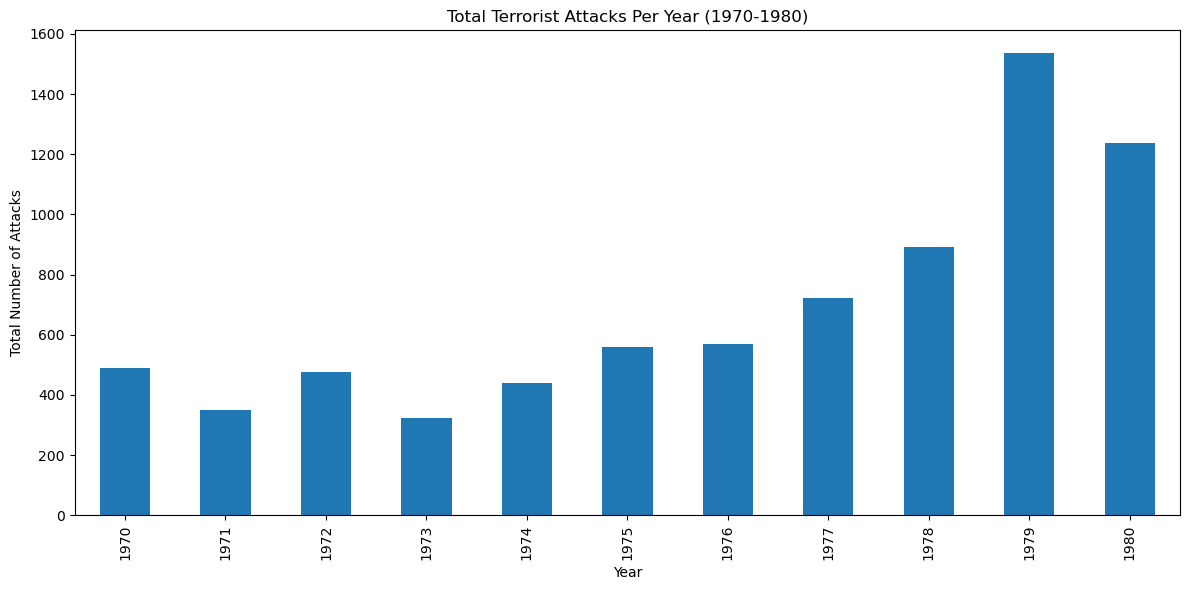

Total number of attacks:  7590


In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Step 1: Group by 'iyear' and count the total occurrences
total_attacks_per_year = df7080.groupby('iyear').size().reset_index(name='total_attacks')

# Step 2: Create a figure for the bar chart
fig, ax = plt.subplots(figsize=(12, 6))  # Adjusted for one plot

# Plotting the bar chart
total_attacks_per_year.plot(kind='bar', x='iyear', y='total_attacks', ax=ax, legend=False)
ax.set_title('Total Terrorist Attacks Per Year (1970-1980)')
ax.set_xlabel('Year')
ax.set_ylabel('Total Number of Attacks')

# Display the plot
plt.tight_layout()
plt.show()
print("Total number of attacks: ", len(df7080))

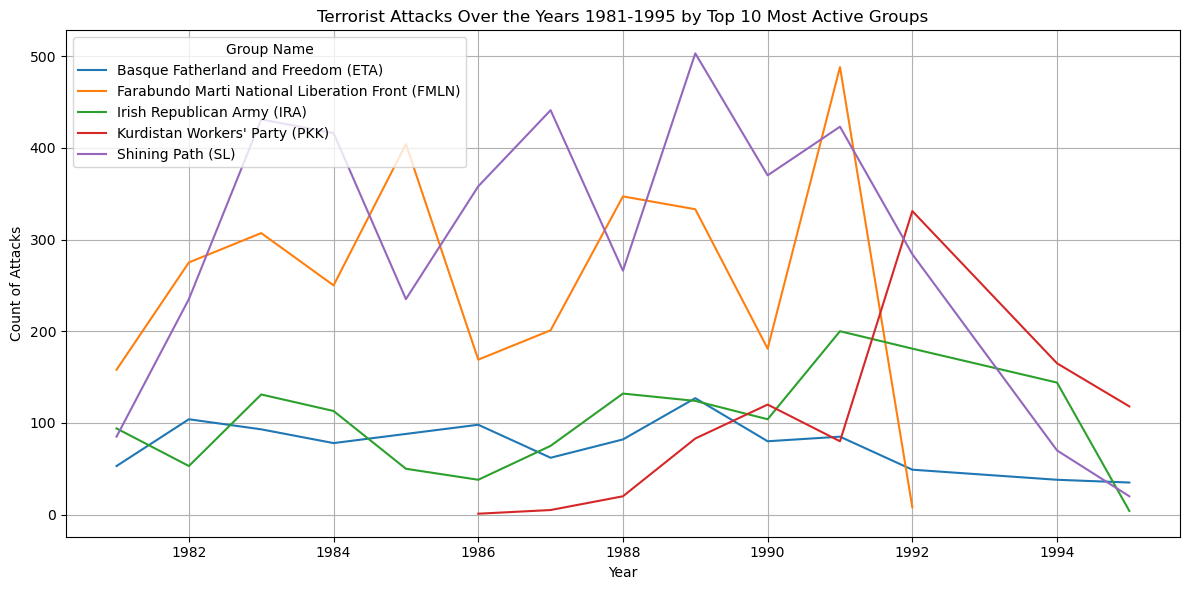

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Step 1: Group by 'iyear' and 'gname' and count the occurrences
weapon_counts = df8195.groupby(['iyear', 'gname']).size().reset_index(name='count')

# Step 2: Identify the top 10 most active groups
top_groups = weapon_counts.groupby('gname')['count'].sum().nlargest(5).index

# Step 3: Filter the data to include only the top 10 groups
filtered_counts = weapon_counts[weapon_counts['gname'].isin(top_groups)]

# Step 4: Pivot the table with filtered data
pivot_table = filtered_counts.pivot(index='iyear', columns='gname', values='count')

# Step 5: Create a figure for the line chart
fig, ax = plt.subplots(figsize=(12, 6))  # Adjusted for one plot

# Plotting the line chart
pivot_table.plot(kind='line', ax=ax)
ax.set_title('Terrorist Attacks Over the Years 1981-1995 by Top 10 Most Active Groups')
ax.set_xlabel('Year')
ax.set_ylabel('Count of Attacks')
ax.legend(title='Group Name', loc='upper left')
ax.grid(True)

# Display the plot
plt.tight_layout()
plt.show()


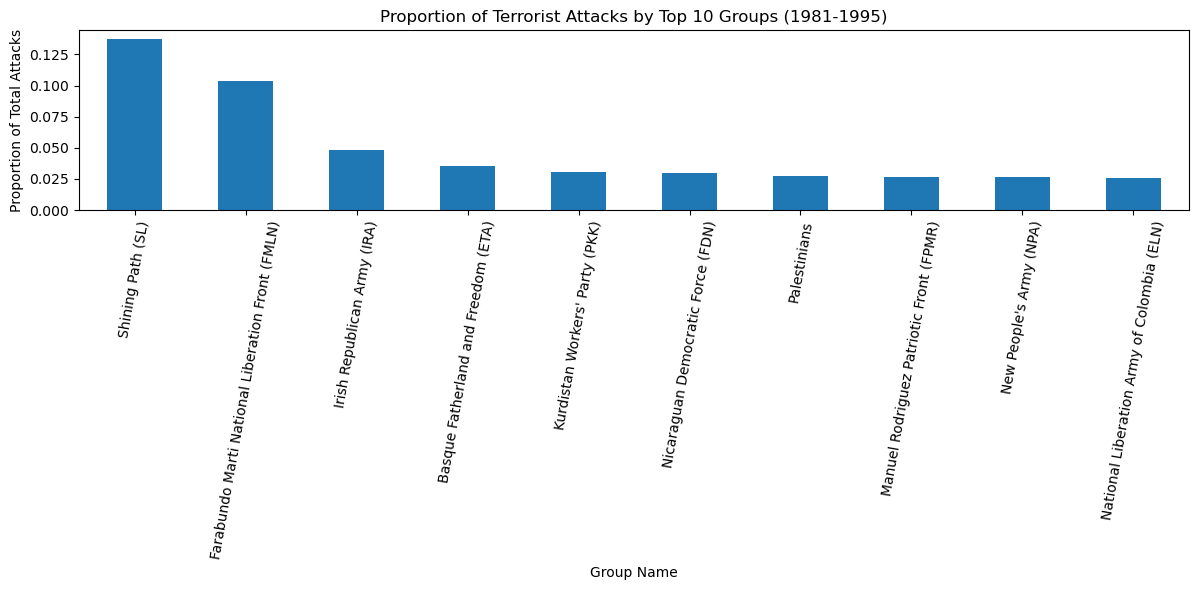

gname
Shining Path (SL)                                   0.137442
Farabundo Marti National Liberation Front (FMLN)    0.103688
Irish Republican Army (IRA)                         0.047940
Basque Fatherland and Freedom (ETA)                 0.035615
Kurdistan Workers' Party (PKK)                      0.030698
Nicaraguan Democratic Force (FDN)                   0.029435
Palestinians                                        0.027309
Manuel Rodriguez Patriotic Front (FPMR)             0.026412
New People's Army (NPA)                             0.026279
National Liberation Army of Colombia (ELN)          0.026047
Name: count, dtype: float64


In [18]:
# Calculate the value counts and then the proportions of each group
top_10_group_proportions = (df8195['gname'].value_counts() / len(df8195)).head(10)

# Plotting the proportions in a bar plot
fig, ax = plt.subplots(figsize=(12, 6))
top_10_group_proportions.plot(kind='bar', ax=ax)
ax.set_title('Proportion of Terrorist Attacks by Top 10 Groups (1981-1995)')
ax.set_xlabel('Group Name')
ax.set_ylabel('Proportion of Total Attacks')

# Display the plot
plt.xticks(rotation=80)  # Rotate the group names for better readability
plt.tight_layout()
plt.show()

print(top_10_group_proportions)

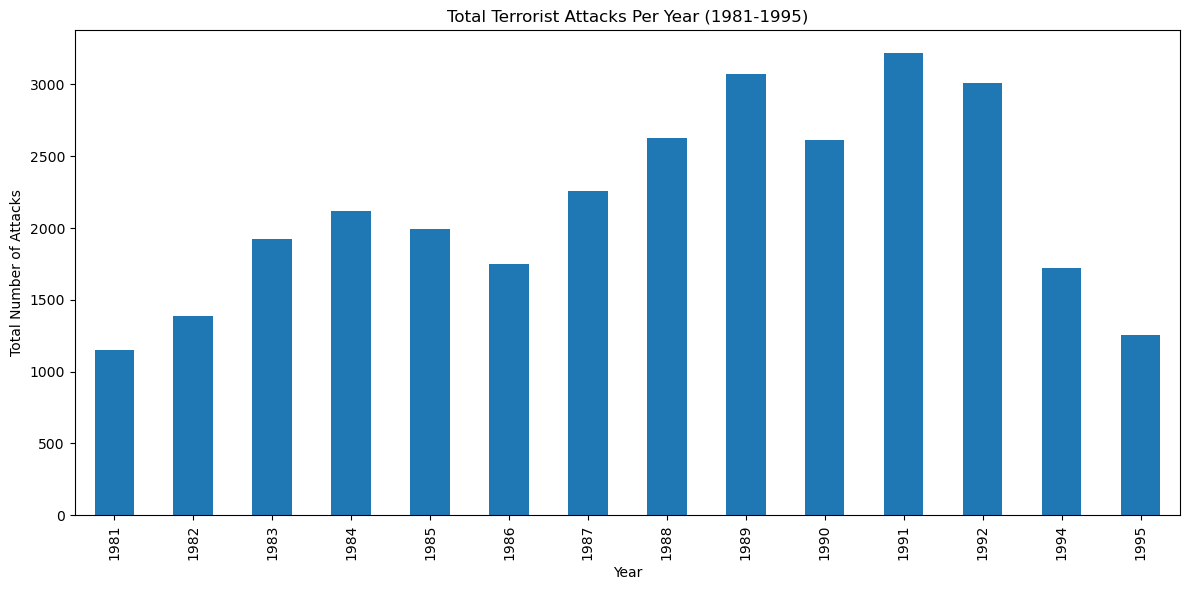

Total number of attacks:  30100


In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Step 1: Group by 'iyear' and count the total occurrences
total_attacks_per_year = df8195.groupby('iyear').size().reset_index(name='total_attacks')

# Step 2: Create a figure for the bar chart
fig, ax = plt.subplots(figsize=(12, 6))  # Adjusted for one plot

# Plotting the bar chart
total_attacks_per_year.plot(kind='bar', x='iyear', y='total_attacks', ax=ax, legend=False)
ax.set_title('Total Terrorist Attacks Per Year (1981-1995)')
ax.set_xlabel('Year')
ax.set_ylabel('Total Number of Attacks')

# Display the plot
plt.tight_layout()
plt.show()
print("Total number of attacks: ", len(df8195))

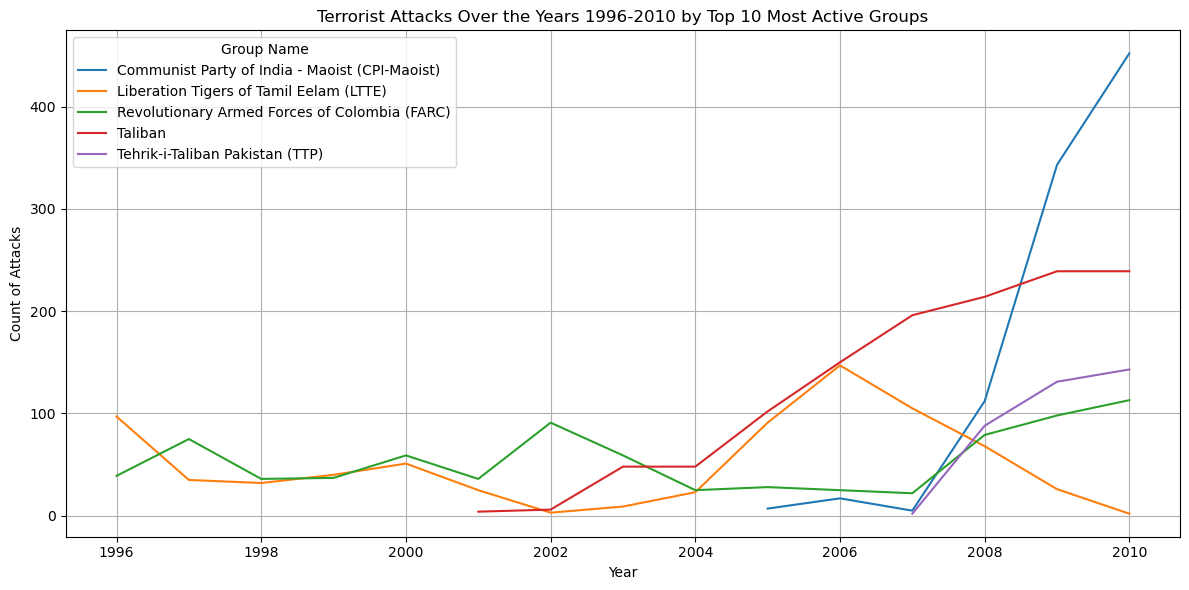

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Step 1: Group by 'iyear' and 'gname' and count the occurrences
weapon_counts = df9610.groupby(['iyear', 'gname']).size().reset_index(name='count')

# Step 2: Identify the top 10 most active groups
top_groups = weapon_counts.groupby('gname')['count'].sum().nlargest(5).index

# Step 3: Filter the data to include only the top 10 groups
filtered_counts = weapon_counts[weapon_counts['gname'].isin(top_groups)]

# Step 4: Pivot the table with filtered data
pivot_table = filtered_counts.pivot(index='iyear', columns='gname', values='count')

# Step 5: Create a figure for the line chart
fig, ax = plt.subplots(figsize=(12, 6))  # Adjusted for one plot

# Plotting the line chart
pivot_table.plot(kind='line', ax=ax)
ax.set_title('Terrorist Attacks Over the Years 1996-2010 by Top 10 Most Active Groups')
ax.set_xlabel('Year')
ax.set_ylabel('Count of Attacks')
ax.legend(title='Group Name', loc='upper left')
ax.grid(True)

# Display the plot
plt.tight_layout()
plt.show()


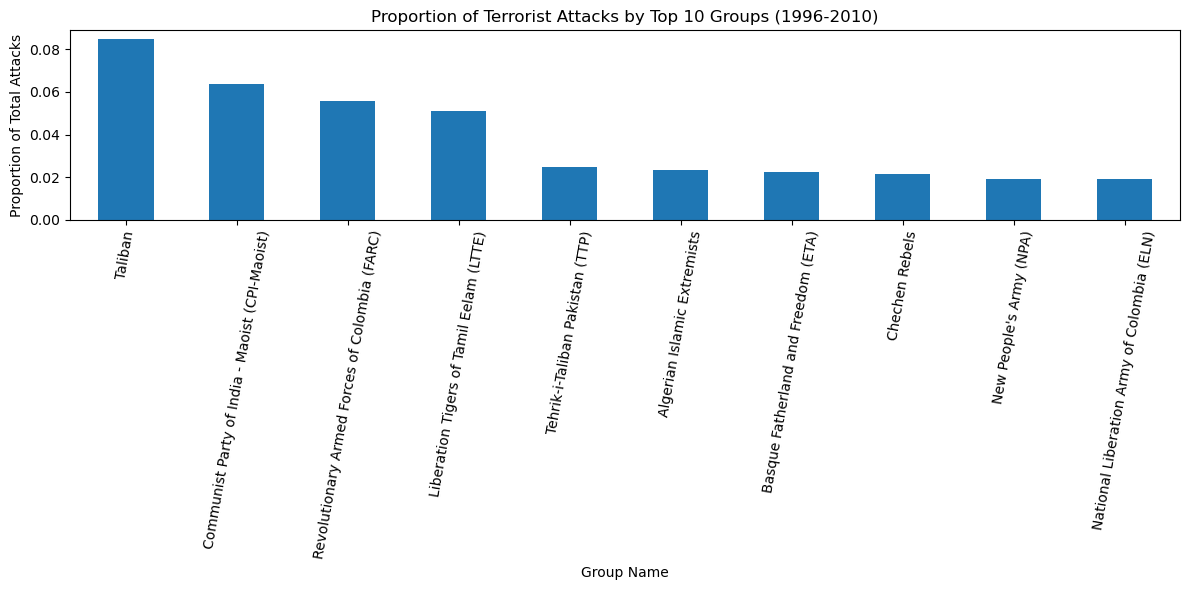

gname
Taliban                                           0.084716
Communist Party of India - Maoist (CPI-Maoist)    0.063639
Revolutionary Armed Forces of Colombia (FARC)     0.055888
Liberation Tigers of Tamil Eelam (LTTE)           0.051265
Tehrik-i-Taliban Pakistan (TTP)                   0.024748
Algerian Islamic Extremists                       0.023525
Basque Fatherland and Freedom (ETA)               0.022369
Chechen Rebels                                    0.021417
New People's Army (NPA)                           0.019309
National Liberation Army of Colombia (ELN)        0.018901
Name: count, dtype: float64


In [21]:
# Calculate the value counts and then the proportions of each group
top_10_group_proportions = (df9610['gname'].value_counts() / len(df9610)).head(10)

# Plotting the proportions in a bar plot
fig, ax = plt.subplots(figsize=(12, 6))
top_10_group_proportions.plot(kind='bar', ax=ax)
ax.set_title('Proportion of Terrorist Attacks by Top 10 Groups (1996-2010)')
ax.set_xlabel('Group Name')
ax.set_ylabel('Proportion of Total Attacks')

# Display the plot
plt.xticks(rotation=80)  # Rotate the group names for better readability
plt.tight_layout()
plt.show()

print(top_10_group_proportions)

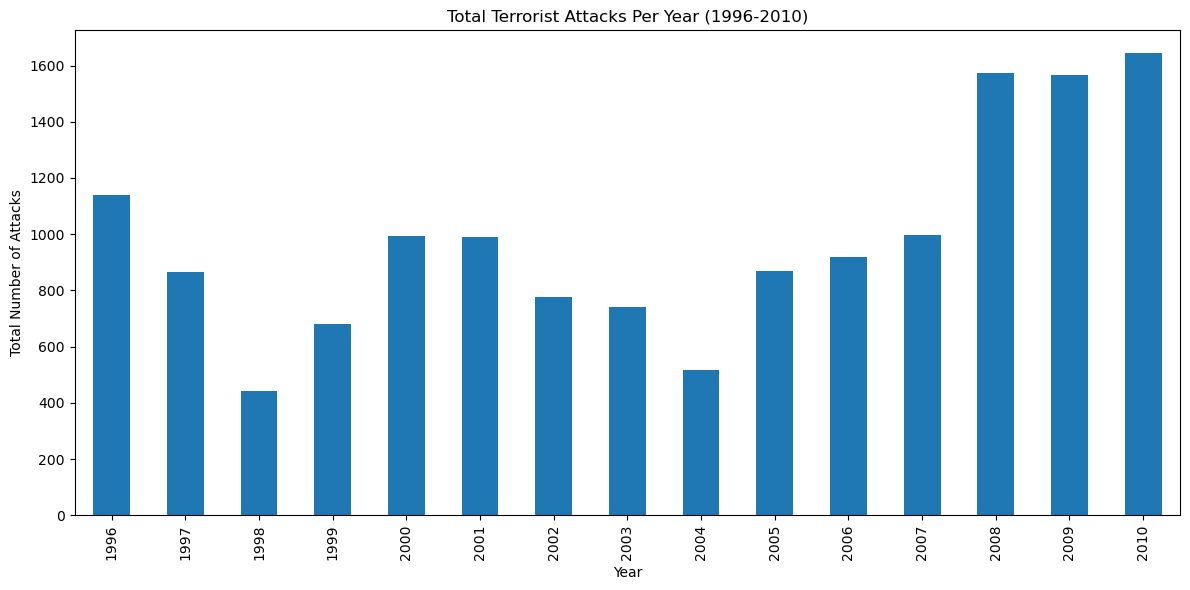

Total number of attacks:  14708


In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Step 1: Group by 'iyear' and count the total occurrences
total_attacks_per_year = df9610.groupby('iyear').size().reset_index(name='total_attacks')

# Step 2: Create a figure for the bar chart
fig, ax = plt.subplots(figsize=(12, 6))  # Adjusted for one plot

# Plotting the bar chart
total_attacks_per_year.plot(kind='bar', x='iyear', y='total_attacks', ax=ax, legend=False)
ax.set_title('Total Terrorist Attacks Per Year (1996-2010)')
ax.set_xlabel('Year')
ax.set_ylabel('Total Number of Attacks')

# Display the plot
plt.tight_layout()
plt.show()
print("Total number of attacks: ", len(df9610))

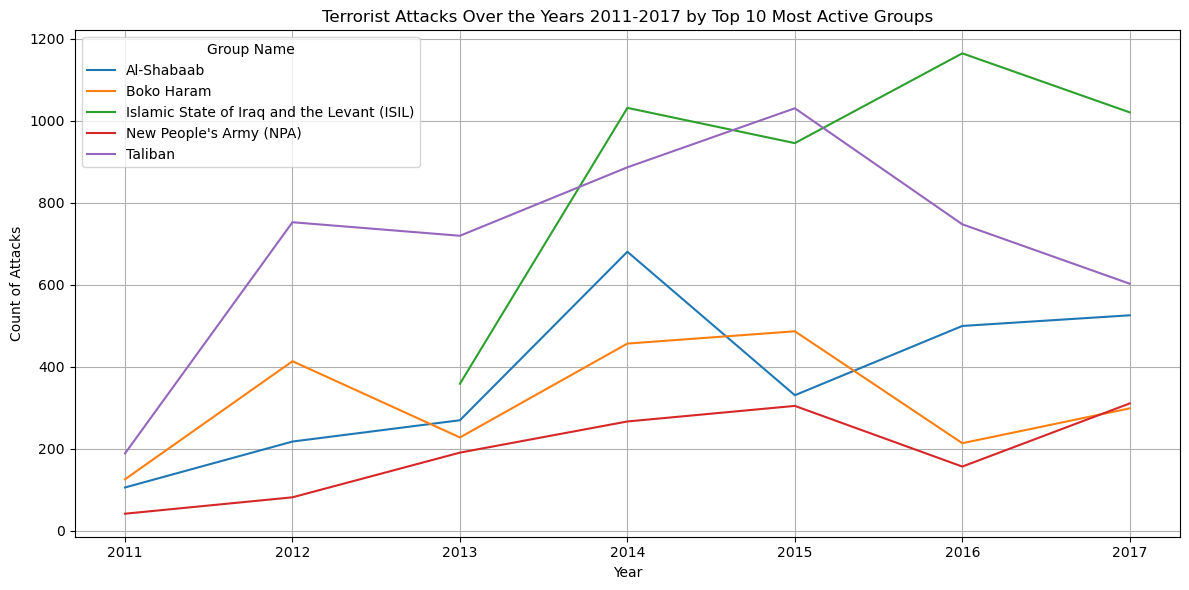

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Step 1: Group by 'iyear' and 'gname' and count the occurrences
weapon_counts = df1117.groupby(['iyear', 'gname']).size().reset_index(name='count')

# Step 2: Identify the top 10 most active groups
top_groups = weapon_counts.groupby('gname')['count'].sum().nlargest(5).index

# Step 3: Filter the data to include only the top 10 groups
filtered_counts = weapon_counts[weapon_counts['gname'].isin(top_groups)]

# Step 4: Pivot the table with filtered data
pivot_table = filtered_counts.pivot(index='iyear', columns='gname', values='count')

# Step 5: Create a figure for the line chart
fig, ax = plt.subplots(figsize=(12, 6))  # Adjusted for one plot

# Plotting the line chart
pivot_table.plot(kind='line', ax=ax)
ax.set_title('Terrorist Attacks Over the Years 2011-2017 by Top 10 Most Active Groups')
ax.set_xlabel('Year')
ax.set_ylabel('Count of Attacks')
ax.legend(title='Group Name', loc='upper left')
ax.grid(True)

# Display the plot
plt.tight_layout()
plt.show()


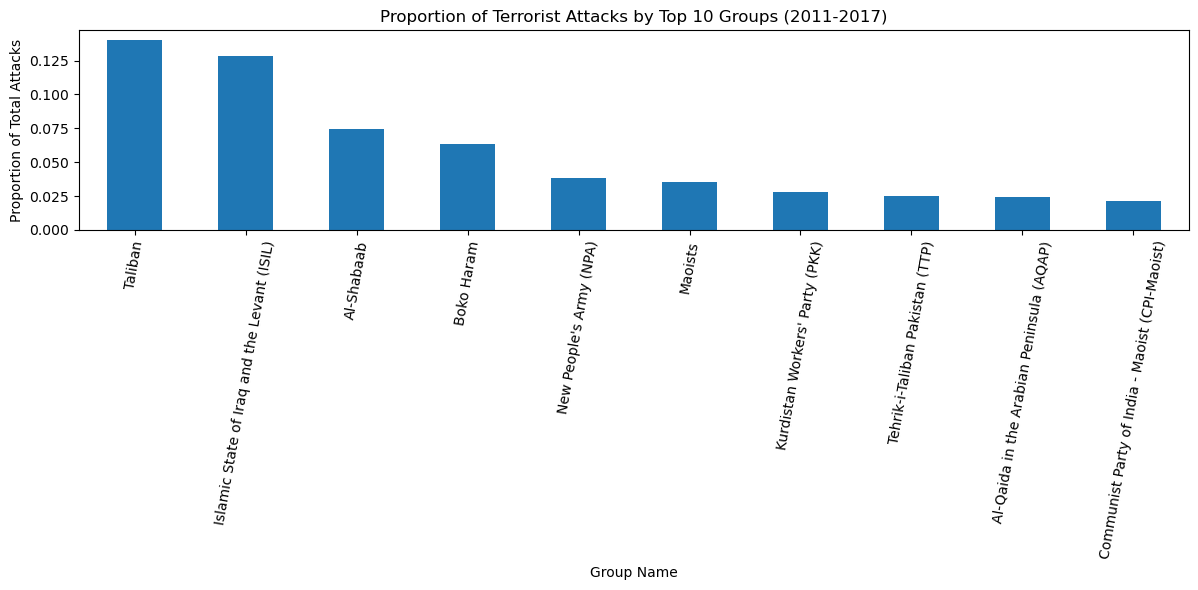

gname
Taliban                                           0.140277
Islamic State of Iraq and the Levant (ISIL)       0.128711
Al-Shabaab                                        0.074782
Boko Haram                                        0.063187
New People's Army (NPA)                           0.038402
Maoists                                           0.035667
Kurdistan Workers' Party (PKK)                    0.027976
Tehrik-i-Taliban Pakistan (TTP)                   0.025326
Al-Qaida in the Arabian Peninsula (AQAP)          0.024215
Communist Party of India - Maoist (CPI-Maoist)    0.021024
Name: count, dtype: float64


In [24]:
# Calculate the value counts and then the proportions of each group
top_10_group_proportions = (df1117['gname'].value_counts() / len(df1117)).head(10)

# Plotting the proportions in a bar plot
fig, ax = plt.subplots(figsize=(12, 6))
top_10_group_proportions.plot(kind='bar', ax=ax)
ax.set_title('Proportion of Terrorist Attacks by Top 10 Groups (2011-2017)')
ax.set_xlabel('Group Name')
ax.set_ylabel('Proportion of Total Attacks')

# Display the plot
plt.xticks(rotation=80)  # Rotate the group names for better readability
plt.tight_layout()
plt.show()

print(top_10_group_proportions)

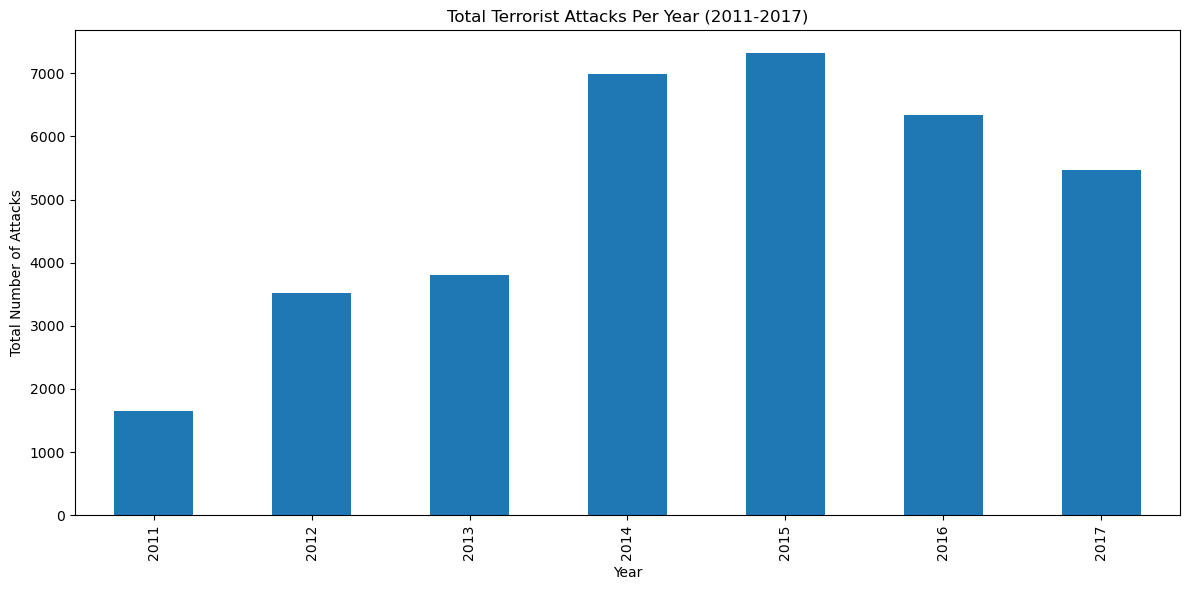

Total number of attacks:  35102


In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Step 1: Group by 'iyear' and count the total occurrences
total_attacks_per_year = df1117.groupby('iyear').size().reset_index(name='total_attacks')

# Step 2: Create a figure for the bar chart
fig, ax = plt.subplots(figsize=(12, 6))  # Adjusted for one plot

# Plotting the bar chart
total_attacks_per_year.plot(kind='bar', x='iyear', y='total_attacks', ax=ax, legend=False)
ax.set_title('Total Terrorist Attacks Per Year (2011-2017)')
ax.set_xlabel('Year')
ax.set_ylabel('Total Number of Attacks')

# Display the plot
plt.tight_layout()
plt.show()
print("Total number of attacks: ", len(df1117))

In [26]:
df7080['gname'].value_counts().head(10)

gname
Irish Republican Army (IRA)                         1082
Basque Fatherland and Freedom (ETA)                  496
Palestinians                                         221
Protestant extremists                                204
Ulster Volunteer Force (UVF)                         172
Left-Wing Militants                                  169
Red Brigades                                         165
Corsican National Liberation Front (FLNC)            155
Farabundo Marti National Liberation Front (FMLN)     147
People's Liberation Forces (FPL)                     133
Name: count, dtype: int64

In [27]:
for dff in dataframes:
    print(len(dff))

7590
30100
14708
35102


In [28]:
group_counts = df7080['gname'].value_counts()
groups_with_enough_entries = group_counts[group_counts >= 100]
print(groups_with_enough_entries)

gname
Irish Republican Army (IRA)                         1082
Basque Fatherland and Freedom (ETA)                  496
Palestinians                                         221
Protestant extremists                                204
Ulster Volunteer Force (UVF)                         172
Left-Wing Militants                                  169
Red Brigades                                         165
Corsican National Liberation Front (FLNC)            155
Farabundo Marti National Liberation Front (FMLN)     147
People's Liberation Forces (FPL)                     133
Black September                                      116
Fuerzas Armadas de Liberacion Nacional (FALN)        109
Montoneros (Argentina)                               106
Name: count, dtype: int64


In [29]:
def filter_classes(dataframe):
    print("Original DataFrame size:", len(dataframe))
    # Step 1: Calculate the frequency of each group in 'enc_group'
    group_counts = dataframe['gname'].value_counts()

    # Step 2: Identify groups that have 100 or more entries
    groups_with_enough_entries = group_counts[group_counts >= 100].index

    # Step 3: Filter the DataFrame to include only these groups
    dataframe = dataframe[dataframe['gname'].isin(groups_with_enough_entries)]

    print("Filtered DataFrame size:", len(dataframe))
    return dataframe

In [30]:
for dff in dataframes:
    _ = filter_classes(dff)

Original DataFrame size: 7590
Filtered DataFrame size: 3275
Original DataFrame size: 30100
Filtered DataFrame size: 23210
Original DataFrame size: 14708
Filtered DataFrame size: 8730
Original DataFrame size: 35102
Filtered DataFrame size: 28567
